In [ ]:
!pip install biopython

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 13.7 MB/s eta 0:00:00


In [ ]:
cell_lines = ["A549", "BT549", "Caco-2", "H1299", "H5578T", 'HACAT', 'HCT116', "HeLa",
              "HEK293T", "HepG2", "Huh7", "Jurkat", "K562", "MCF-7", "NB4", "SKER3", "SW480",
              "U2OS", "U937", "Hep3B", "HL60", "SKBR3", "HepaRG", "TF-1", "PANC-1", "Hs578T", "T-47D", "ZR-75-1",
              "HCT116", "HT-29", "Hs 578T", "HT1080", "JY", "KBM-7", "KM12", "LAPC4", "NCI-60", "LNCaP",
              "LOX-IMVI", "M14", "MDA-MB-231", "MDA-MB-435", "MDA-MB-453", "MDA-MB-468", "MDA-N", "MIA PaCa-2", "MOLT-4",
              "MRC-5", "NCI-60", "NCI-H23", "NCI-H226", "NCI-H460", "NK-92", 'NTERA-2', "OVCAR-3", "OVCAR-8","PANC-1", "PC3",
              "Raji", "RPMI-7951", "Saos-2" , "SF-268", "SF-539", "SH-SY5Y", "SK-MEL-5", "SK-MEL-28", "SK-OV-3", "SNB-19", "SW-620",
              "T-47D", "T98G", "THP-1", "U-87", "U251", "VCaP", "VG-1", "WI-38", "ZR-75-1", 'NCI-60', 'A431', 'ACHN', 'BCP-1' , 'BOSC23',
              'BT-20', 'BT-549', 'BxPC-3', 'Caki-1', 'Calu-3', 'CCRF-CEM', 'DU145', 'H295R', 'HAP1' , 'HCC-2998', "Calu-3",
              "H9c2(2-1)", "SH-SY5Y"]

# PubMed article

In [ ]:
from Bio import Entrez

def search_articles(cell_line, start_year, end_year):
    Entrez.email = "arzumanian.victoria@gmail.com"  # Always provide your email
    query = f"{cell_line}[Title/Abstract] AND ({start_year}[Date - Publication] : {end_year}[Date - Publication])"
    handle = Entrez.esearch(db="pubmed", term=query, retmax=100000)
    record = Entrez.read(handle)
    handle.close()
    return int(record["Count"])

article_counts = {}

for cell_line in cell_lines:
    count = search_articles(cell_line, 2013, 2023)
    article_counts[cell_line] = count

print(article_counts)

{'A549': 25015, 'BT549': 573, 'Caco-2': 10567, 'H1299': 2538, 'H5578T': 0, 'HACAT': 5709, 'HCT116': 9864, 'HeLa': 22803, 'HEK293T': 4463, 'HepG2': 25188, 'Huh7': 4885, 'Jurkat': 3959, 'K562': 5572, 'MCF-7': 23157, 'NB4': 732, 'SKER3': 0, 'SW480': 3230, 'U2OS': 2022, 'U937': 2631, 'Hep3B': 1761, 'HL60': 4268, 'SKBR3': 2022, 'HepaRG': 970, 'TF-1': 301, 'PANC-1': 2688, 'Hs578T': 360, 'T-47D': 453, 'ZR-75-1': 212, 'HT-29': 5528, 'Hs 578T': 70, 'HT1080': 898, 'JY': 185, 'KBM-7': 11, 'KM12': 74, 'LAPC4': 97, 'NCI-60': 542, 'LNCaP': 4233, 'LOX-IMVI': 31, 'M14': 369, 'MDA-MB-231': 15453, 'MDA-MB-435': 387, 'MDA-MB-453': 418, 'MDA-MB-468': 1476, 'MDA-N': 26, 'MIA PaCa-2': 912, 'MOLT-4': 473, 'MRC-5': 1391, 'NCI-H23': 132, 'NCI-H226': 61, 'NCI-H460': 927, 'NK-92': 364, 'NTERA-2': 83, 'OVCAR-3': 745, 'OVCAR-8': 106, 'PC3': 8527, 'Raji': 935, 'RPMI-7951': 36, 'Saos-2': 1444, 'SF-268': 73, 'SF-539': 12, 'SH-SY5Y': 8154, 'SK-MEL-5': 94, 'SK-MEL-28': 386, 'SK-OV-3': 524, 'SNB-19': 61, 'SW-620': 136, 

In [ ]:
import pandas as pd
data=pd.DataFrame.from_dict(article_counts, orient='index')

In [ ]:
data.to_excel('/content/drive/MyDrive/data_all_2024_ver_all.xlsx', sheet_name='HACAT_wt_p53')

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
data2 = pd.read_excel('/content/drive/MyDrive/data_all_2024.xlsx')

In [ ]:
data2

In [ ]:
c= ['darkblue', 'lightblue', 'peru', 'olivedrab', 'palegoldenrod', '#d3a9b7', 'purple', 'lightslategray', 'brown',
    'lightblue', 'black', 'teal', 'tomato', 'gainsboro', 'firebrick', 'peachpuff', 'darkorange', 'darkgrey', 'darkkhaki', 'gold', 'mediumslateblue',
    'violet', 'darkorchid', 'turquoise', 'lime', 'slategrey', 'rosybrown']

c

['darkblue',
 'lightblue',
 'peru',
 'olivedrab',
 'palegoldenrod',
 '#d3a9b7',
 'purple',
 'lightslategray',
 'brown',
 'lightblue',
 'black',
 'teal',
 'tomato',
 'gainsboro',
 'firebrick',
 'peachpuff',
 'darkorange',
 'darkgrey',
 'darkkhaki',
 'gold',
 'mediumslateblue',
 'violet',
 'darkorchid',
 'turquoise',
 'lime',
 'slategrey',
 'rosybrown']

<ipython-input-34-afd89a3d6306>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(data2['Cell'], rotation=60, fontweight=15, size=12, horizontalalignment= 'right')
<ipython-input-34-afd89a3d6306>:16: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


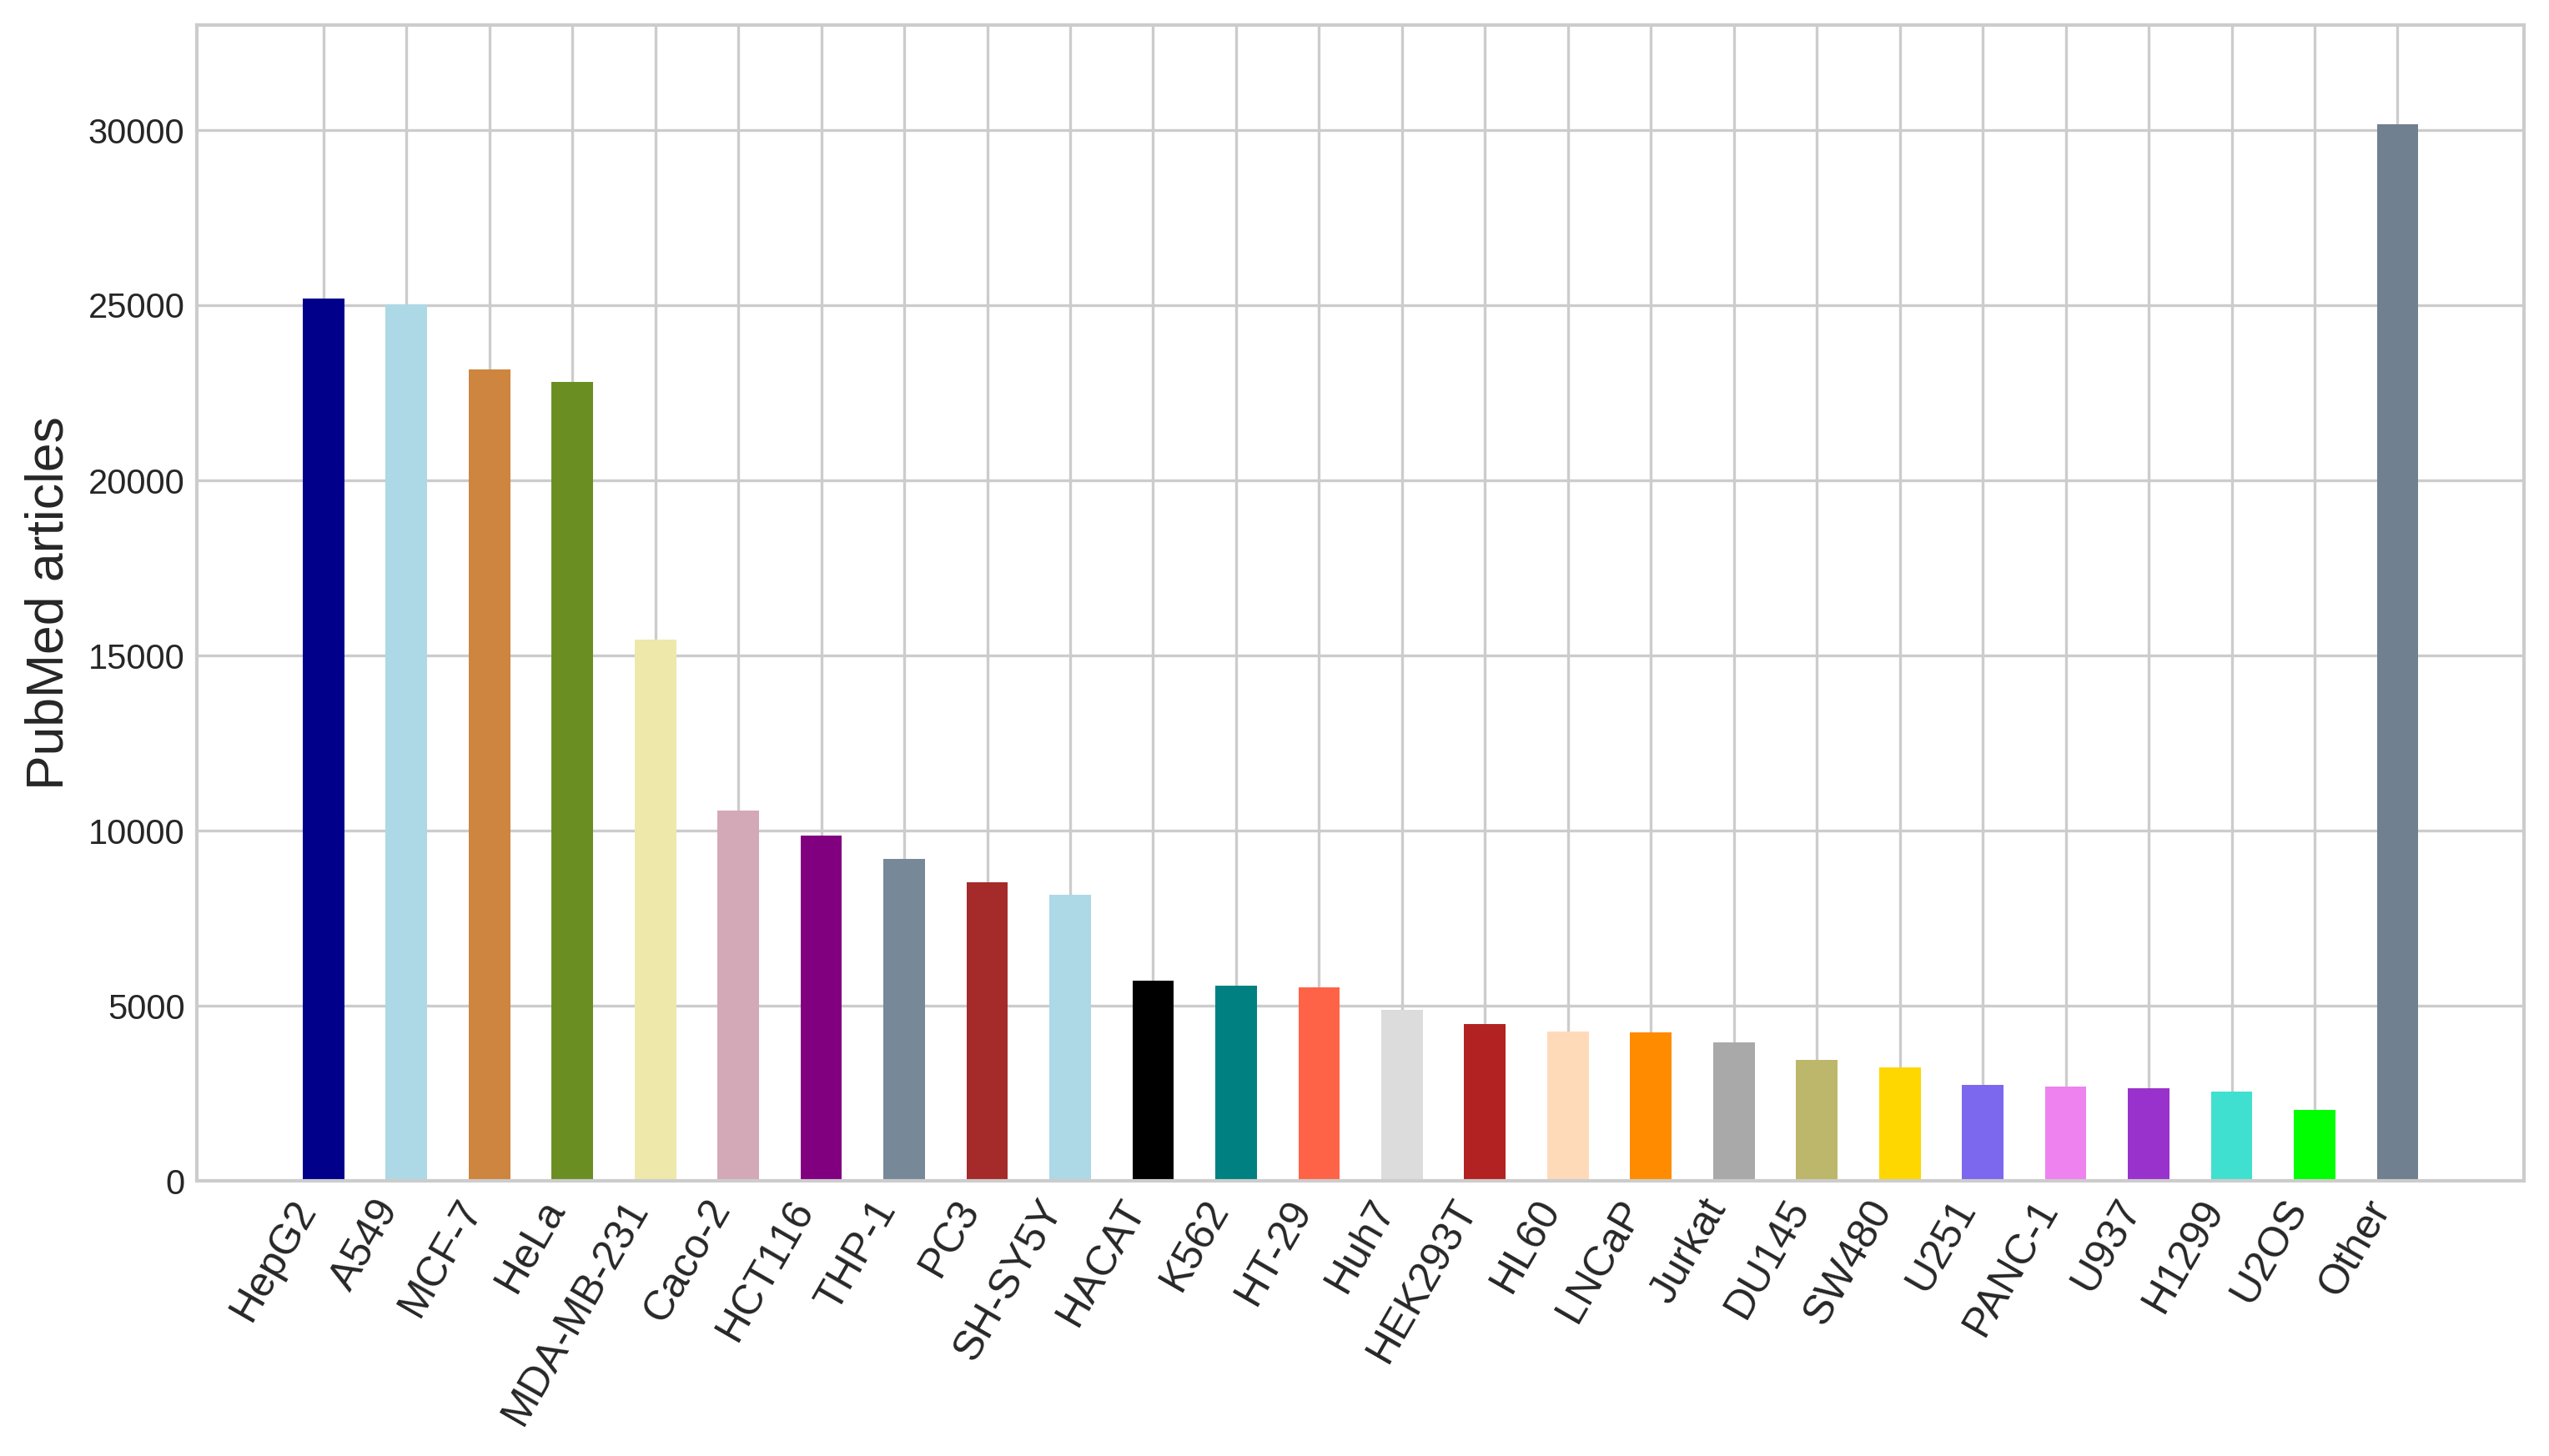

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

# Plot Bars
plt.figure(figsize=(12,6), dpi= 300)
plt.bar(data2['Cell'], data2['Num'], color=c, width=.5)

# Decoration
plt.gca().set_xticklabels(data2['Cell'], rotation=60, fontweight=15, size=12, horizontalalignment= 'right')
plt.ylabel('PubMed articles', fontsize=15)
plt.ylim(0, 33000)
plt.style.use('seaborn-whitegrid')
plt.show()
plt.savefig('/content/drive/MyDrive/hist_PubMed.png')

# SRA data

In [ ]:
from Bio import Entrez

def search_articles(cell_line, start_year, end_year):
    Entrez.email = "arzumanian.victoria@gmail.com"  # Always provide your email
    query = f"{cell_line}[All Fields] AND control[All Fields]) AND (biomol rna[Properties] AND platform illumina[Properties])"
    handle = Entrez.esearch(db="sra", term=query, retmax=100000)
    record = Entrez.read(handle)
    handle.close()
    return int(record["Count"])

article_counts = {}

for cell_line in cell_lines:
    count = search_articles(cell_line, 2013, 2023)
    article_counts[cell_line] = count

print(article_counts)

{'A549': 1268, 'BT549': 71, 'Caco-2': 409, 'H1299': 143, 'H5578T': 0, 'HACAT': 183, 'HCT116': 1261, 'HeLa': 2892, 'HEK293T': 2264, 'HepG2': 1349, 'Huh7': 303, 'Jurkat': 359, 'K562': 944, 'MCF-7': 1719, 'NB4': 49, 'SKER3': 0, 'SW480': 143, 'U2OS': 585, 'U937': 211, 'Hep3B': 64, 'HL60': 61, 'SKBR3': 36, 'HepaRG': 539, 'TF-1': 6, 'PANC-1': 194, 'Hs578T': 16, 'T-47D': 55, 'ZR-75-1': 9, 'HT-29': 144, 'Hs 578T': 23, 'HT1080': 54, 'JY': 9, 'KBM-7': 14, 'KM12': 7, 'LAPC4': 23, 'NCI-60': 3, 'LNCaP': 898, 'LOX-IMVI': 2, 'M14': 76, 'MDA-MB-231': 936, 'MDA-MB-435': 1, 'MDA-MB-453': 16, 'MDA-MB-468': 160, 'MDA-N': 0, 'MIA PaCa-2': 116, 'MOLT-4': 6, 'MRC-5': 25, 'NCI-H23': 7, 'NCI-H226': 9, 'NCI-H460': 21, 'NK-92': 18, 'NTERA-2': 21, 'OVCAR-3': 34, 'OVCAR-8': 59, 'PC3': 571, 'Raji': 126, 'RPMI-7951': 0, 'Saos-2': 27, 'SF-268': 0, 'SF-539': 0, 'SH-SY5Y': 415, 'SK-MEL-5': 0, 'SK-MEL-28': 65, 'SK-OV-3': 0, 'SNB-19': 0, 'SW-620': 0, 'T98G': 47, 'THP-1': 687, 'U-87': 17, 'U251': 113, 'VCaP': 90, 'VG-1': 

In [ ]:
data3=pd.DataFrame.from_dict(article_counts, orient='index')

In [ ]:
data3.to_excel('/content/drive/MyDrive/data3_all_2024.xlsx', sheet_name='HACAT_wt_p53')

<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [ ]:
data3 = pd.read_excel('/content/drive/MyDrive/data3_all_2024.xlsx')